In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
colors = sns.color_palette(palette='Greens_d',n_colors=7)

## Importing the data

In [4]:
data = pd.read_csv("CreditCardAttritionDataset.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
data.shape

(10127, 21)

## Exploratory data analysis (EDA)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [8]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [9]:
data = data.drop(columns=['CLIENTNUM'])

In [10]:
categorical_features = [col for col in data.columns if data[col].dtype == 'object']
numerical_features = [col for col in data.columns if col not in categorical_features]

print(f"#categorical_features = {len(categorical_features)} \n#numerical_features = {len(numerical_features)}\n")
print(f"Categorical features: {categorical_features}\nNumerical features: {numerical_features}")

#categorical_features = 6 
#numerical_features = 14

Categorical features: ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
Numerical features: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [11]:
for i in categorical_features:
    print(f"{i} = {data[i].unique()}")

Attrition_Flag = ['Existing Customer' 'Attrited Customer']
Gender = ['M' 'F']
Education_Level = ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status = ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category = ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category = ['Blue' 'Gold' 'Silver' 'Platinum']


In [12]:
demog_features = ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category']
engag_features = ['Months_Inactive_12_mon', 'Contacts_Count_12_mon','Total_Trans_Amt', 'Total_Trans_Ct','Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
finan_features = [col for col in data.columns if col not in (demog_features + engag_features)]
finan_features.remove('Attrition_Flag')
print(f"demog_features: {demog_features}\nengag_features: {engag_features}\nfinan_features: {finan_features}")

demog_features: ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category']
engag_features: ['Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
finan_features: ['Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy']


In [13]:
data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

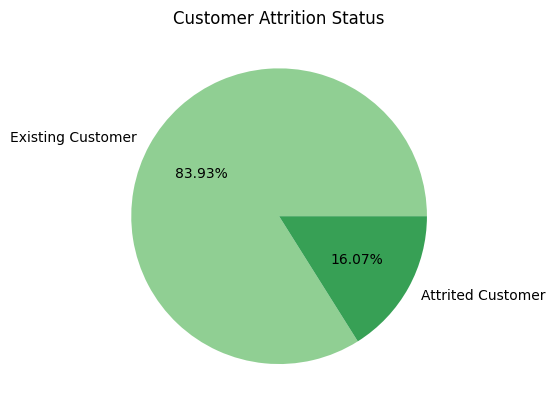

In [14]:
counts_attrition_flag = data['Attrition_Flag'].value_counts()

plt.pie(x= counts_attrition_flag, labels=counts_attrition_flag.index, autopct="%1.2f%%", colors=[colors[0],colors[3]])
plt.title('Customer Attrition Status')
# plt.savefig('Attrition_Flag',bbox_inches='tight',dpi=300)
plt.show()


In [15]:
desired_order = ['Married','Single','Divorced', 'Unknown']
data['Marital_Status'] = pd.Categorical(data['Marital_Status'], categories=desired_order)

desired_order = ['Doctorate','Post-Graduate','Graduate','College','High School', 'Uneducated','Unknown']
data['Education_Level'] = pd.Categorical(data['Education_Level'], categories=desired_order)

desired_order = ['Less than $40K', '$40K - $60K','$60K - $80K','$80K - $120K', '$120K +', 'Unknown']
data['Income_Category'] = pd.Categorical(data['Income_Category'], categories=desired_order)

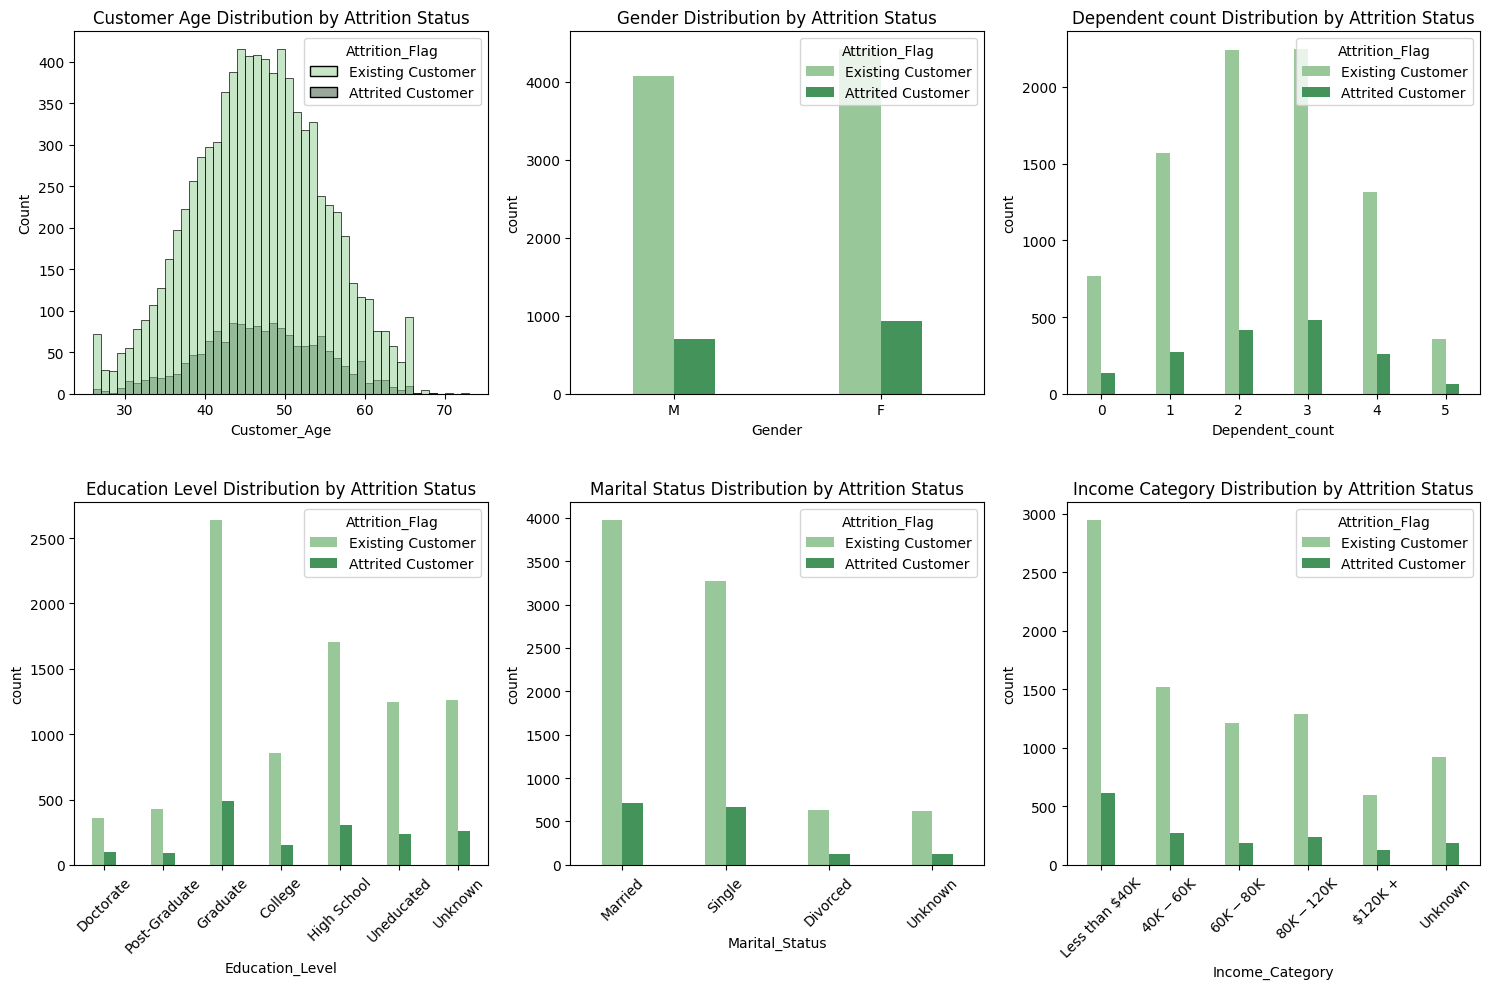

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

demog_titles = ['Customer Age Distribution by Attrition Status', 'Gender Distribution by Attrition Status', 'Dependent count Distribution by Attrition Status', 'Education Level Distribution by Attrition Status', 'Marital Status Distribution by Attrition Status', 'Income Category Distribution by Attrition Status']


for i in range(len(demog_features)):
    if demog_features[i] == 'Customer_Age':
        sns.histplot(data=data, x='Customer_Age', hue= 'Attrition_Flag', kde=False, palette=[colors[0],colors[6]], ax=axes[i // 3, i % 3])
        axes[i // 3, i % 3].set_title(demog_titles[i])

    else:
        sns.countplot(data=data, x=demog_features[i],width=0.4, hue='Attrition_Flag',  palette=[colors[0],colors[3]], ax=axes[i // 3, i % 3])
        axes[i // 3, i % 3].set_title(demog_titles[i])
    
    if i // 3 == 1:
        axes[i // 3, i % 3].tick_params(axis='x', rotation=45)


# Adjust layout to add more space between rows
plt.tight_layout()

# # Add extra space between rows
plt.subplots_adjust(hspace=0.3)     
# plt.savefig('demog_features',bbox_inches='tight',dpi=300)
plt.show()


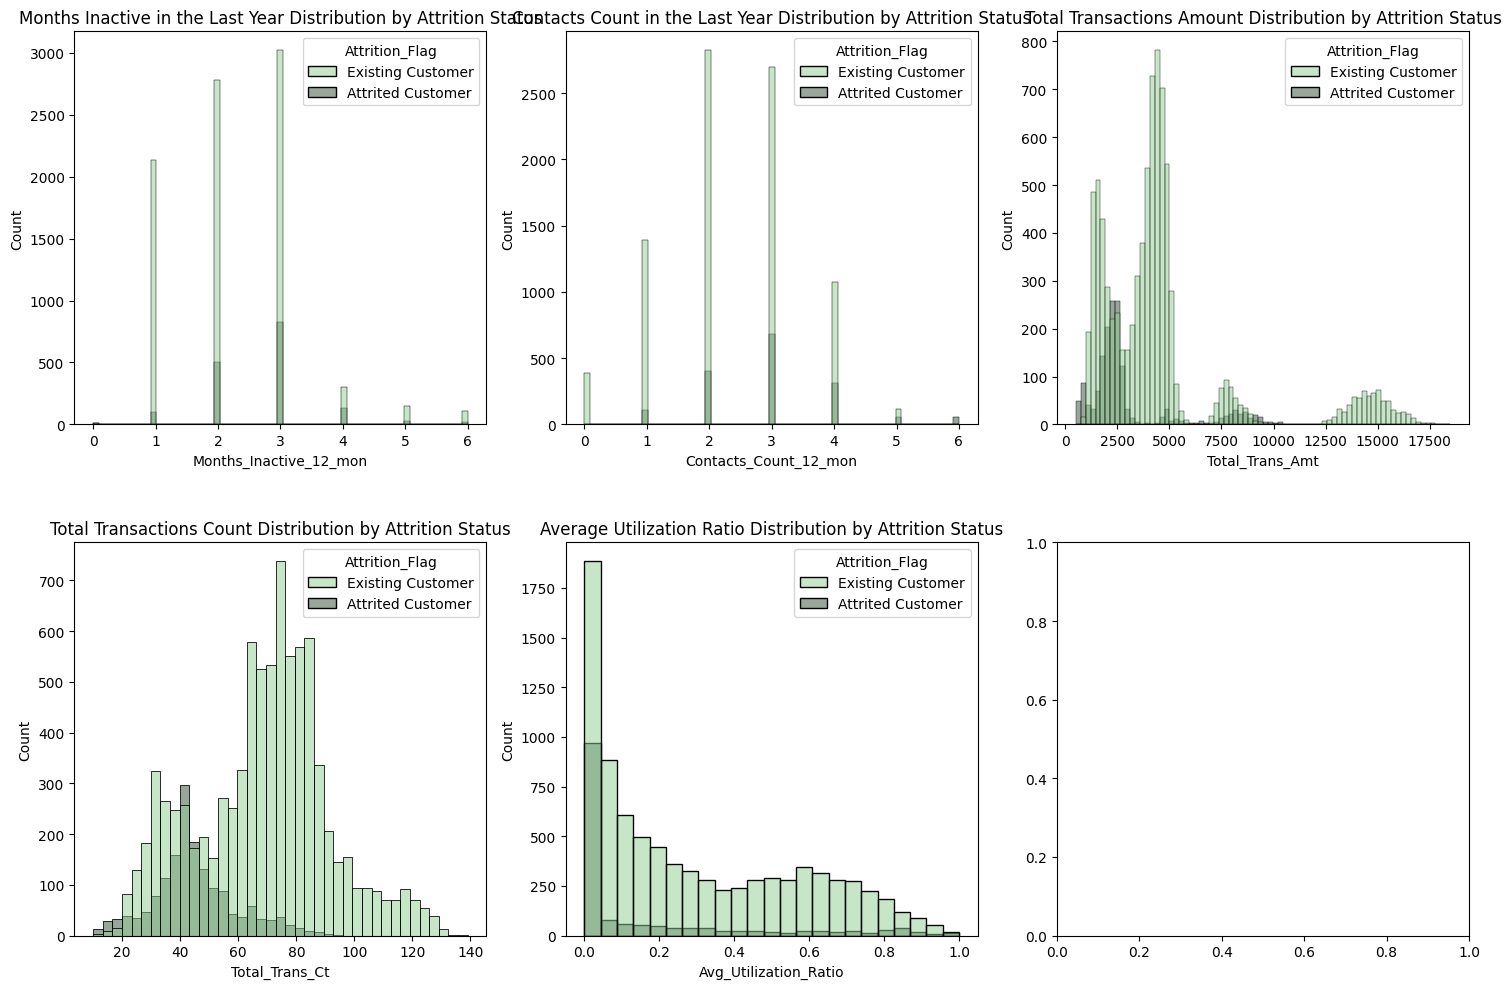

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

engag_titles = ['Months Inactive in the Last Year Distribution by Attrition Status', 'Contacts Count in the Last Year Distribution by Attrition Status', 'Total Transactions Amount Distribution by Attrition Status', 'Total Transactions Count Distribution by Attrition Status', 'Average Utilization Ratio Distribution by Attrition Status']
E_engag_features= ['Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']


for i in range(len(E_engag_features)):
    sns.histplot(data=data, x=E_engag_features[i], hue= 'Attrition_Flag', kde=False, palette=[colors[0],colors[6]], ax=axes[ i // 3, i % 3])
    axes[  i // 3, i % 3].set_title(engag_titles[i])


# Adjust layout to add more space between rows
plt.tight_layout()

# # Add extra space between rows
plt.subplots_adjust(hspace=0.3)     
# plt.savefig('engag_features',bbox_inches='tight',dpi=300)
plt.show()

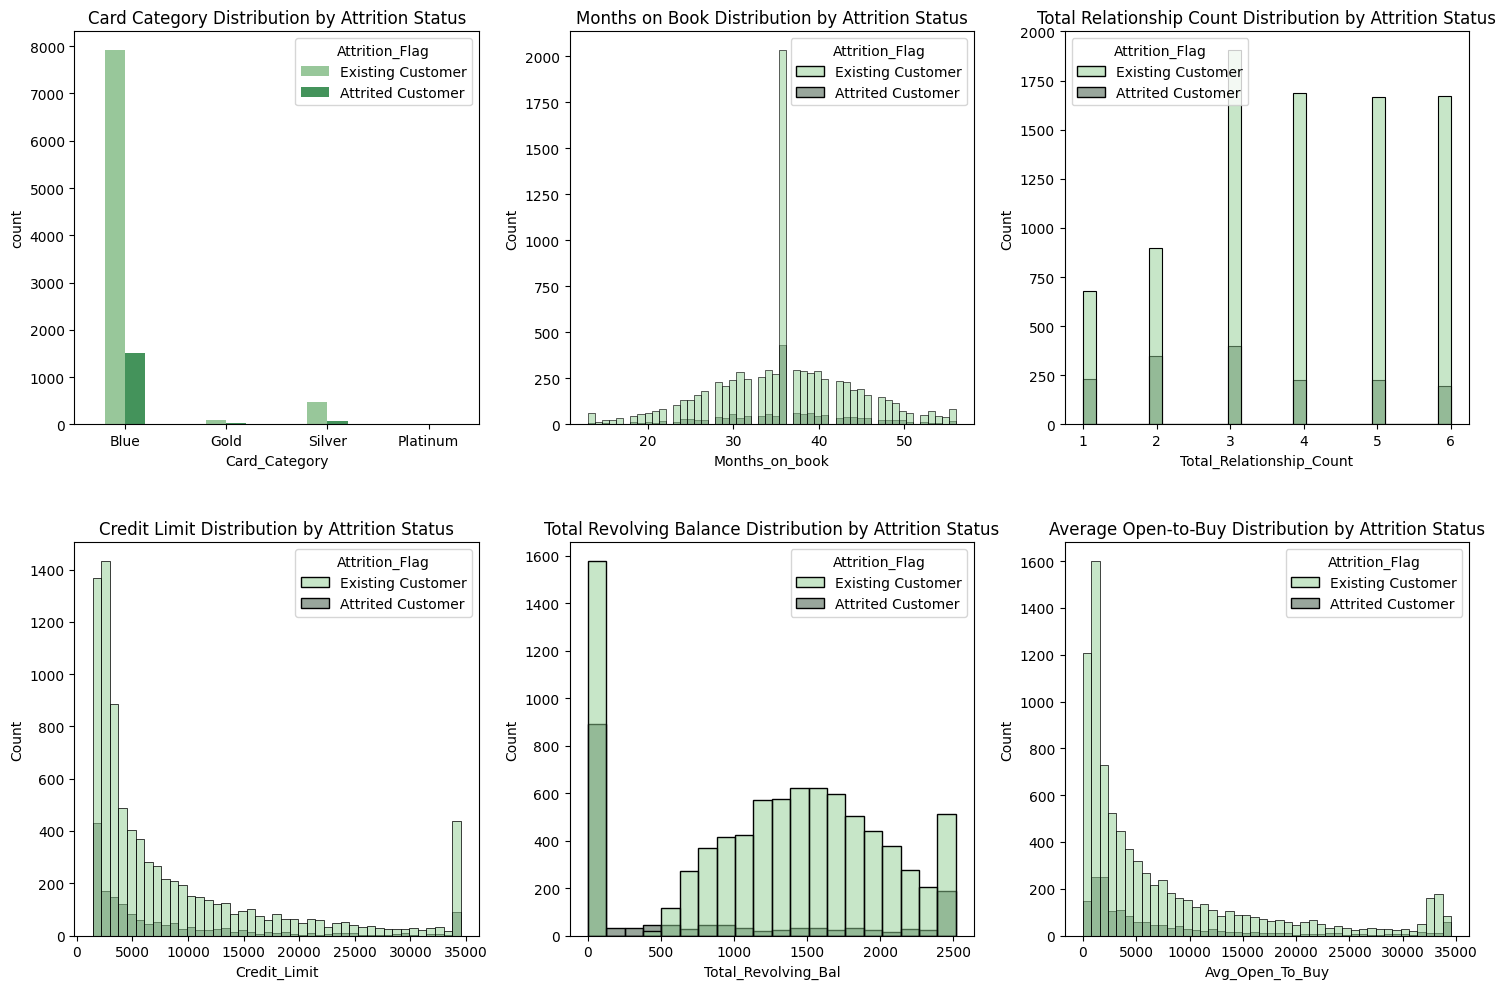

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

finan_titles = ['Card Category Distribution by Attrition Status', 'Months on Book Distribution by Attrition Status', 'Total Relationship Count Distribution by Attrition Status', 'Credit Limit Distribution by Attrition Status', 'Total Revolving Balance Distribution by Attrition Status', 'Average Open-to-Buy Distribution by Attrition Status']


for i in range(len(finan_features)):
    if finan_features[i] == 'Card_Category':
        sns.countplot(data=data, x='Card_Category',width=0.4, hue='Attrition_Flag',  palette=[colors[0],colors[3]], ax=axes[i // 3, i % 3])
        axes[i // 3, i % 3].set_title(finan_titles[i])

    else:        
        sns.histplot(data=data, x=finan_features[i], hue= 'Attrition_Flag', kde=False, palette=[colors[0],colors[6]], ax=axes[i // 3, i % 3])
        axes[i // 3, i % 3].set_title(finan_titles[i])


    


# Adjust layout to add more space between rows
plt.tight_layout()

# # Add extra space between rows
plt.subplots_adjust(hspace=0.3)     
# plt.savefig('finan_features',bbox_inches='tight',dpi=300)
plt.show()

## Data Cleaning

In [19]:
def detect_and_drop_outliers_iqr(df, numerical_features):
  outliers = {}
  for column in numerical_features:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and drop outliers
    outliers[column] = df[column].between(lower_bound, upper_bound)
    df = df[outliers[column]]  # Filter DataFrame to exclude outliers

  return df

# Detect and drop outliers
clean_data = detect_and_drop_outliers_iqr(data.copy(), numerical_features)


In [20]:
clean_data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10,Existing Customer,42,M,5,Uneducated,Unknown,$120K +,Blue,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
14,Existing Customer,57,F,2,Graduate,Married,Less than $40K,Blue,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
19,Existing Customer,45,F,2,Graduate,Married,Unknown,Blue,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
21,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
23,Existing Customer,47,F,4,Unknown,Single,Less than $40K,Blue,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10022,Attrited Customer,46,M,3,Graduate,Married,$60K - $80K,Blue,34,1,2,4,4930.0,159,4771.0,0.592,7412,60,0.579,0.032
10048,Attrited Customer,48,M,4,College,Married,$80K - $120K,Blue,44,2,3,3,9524.0,1449,8075.0,0.559,7527,58,0.657,0.152
10067,Attrited Customer,49,F,4,Uneducated,Married,$40K - $60K,Blue,36,5,2,3,4167.0,0,4167.0,0.581,7590,87,0.776,0.000
10089,Attrited Customer,52,F,5,Unknown,Married,Less than $40K,Blue,36,4,3,3,9611.0,0,9611.0,0.840,7636,64,0.829,0.000


In [21]:
clean_data.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,46.384032,2.389138,35.951106,3.939192,2.274486,2.497138,5084.608170,1140.233792,3944.374377,0.728738,3593.651710,62.892155,0.687565,0.320961
std,7.506139,1.272785,7.036630,1.514048,0.863391,0.930392,3921.874545,817.255076,3934.216696,0.162697,1568.378776,19.472826,0.181285,0.283666
min,26.000000,0.000000,18.000000,1.000000,1.000000,1.000000,1438.300000,0.000000,10.000000,0.293000,510.000000,10.000000,0.207000,0.000000
25%,41.000000,1.000000,32.000000,3.000000,2.000000,2.000000,2264.000000,0.000000,1018.000000,0.620000,2216.000000,46.000000,0.569000,0.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,3.000000,3359.000000,1250.000000,2229.000000,0.721000,3908.000000,67.000000,0.689000,0.260000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,6841.000000,1766.500000,5712.500000,0.836000,4581.000000,79.000000,0.808000,0.570000
max,68.000000,5.000000,53.000000,6.000000,4.000000,4.000000,19099.000000,2517.000000,16582.000000,1.193000,8454.000000,113.000000,1.182000,0.995000


In [22]:
# Check all columns have an unknown value
has_unknown = []
for col in categorical_features:
    unknown_var = (clean_data[col]=='Unknown').any()
    if unknown_var:
        has_unknown.append(col)
    else: pass
print(f"The list of columns with unknown values are {has_unknown}")    


portion_unknown = {}
for i in has_unknown:
    portion_unknown[i] = round(  clean_data[clean_data[i] == 'Unknown'].shape[0]  /  clean_data.shape[0]  ,2)
print(f"Portion of unknown values: {portion_unknown}") 

The list of columns with unknown values are ['Education_Level', 'Marital_Status', 'Income_Category']
Portion of unknown values: {'Education_Level': 0.15, 'Marital_Status': 0.08, 'Income_Category': 0.11}


In [23]:
clean_data['Education_Level'].replace('Unknown', clean_data['Education_Level'].mode()[0], inplace=True)
clean_data['Marital_Status'].replace('Unknown', clean_data['Marital_Status'].mode()[0], inplace=True)
clean_data['Income_Category'].replace('Unknown', clean_data['Income_Category'].mode()[0], inplace=True)

## Pair Plots

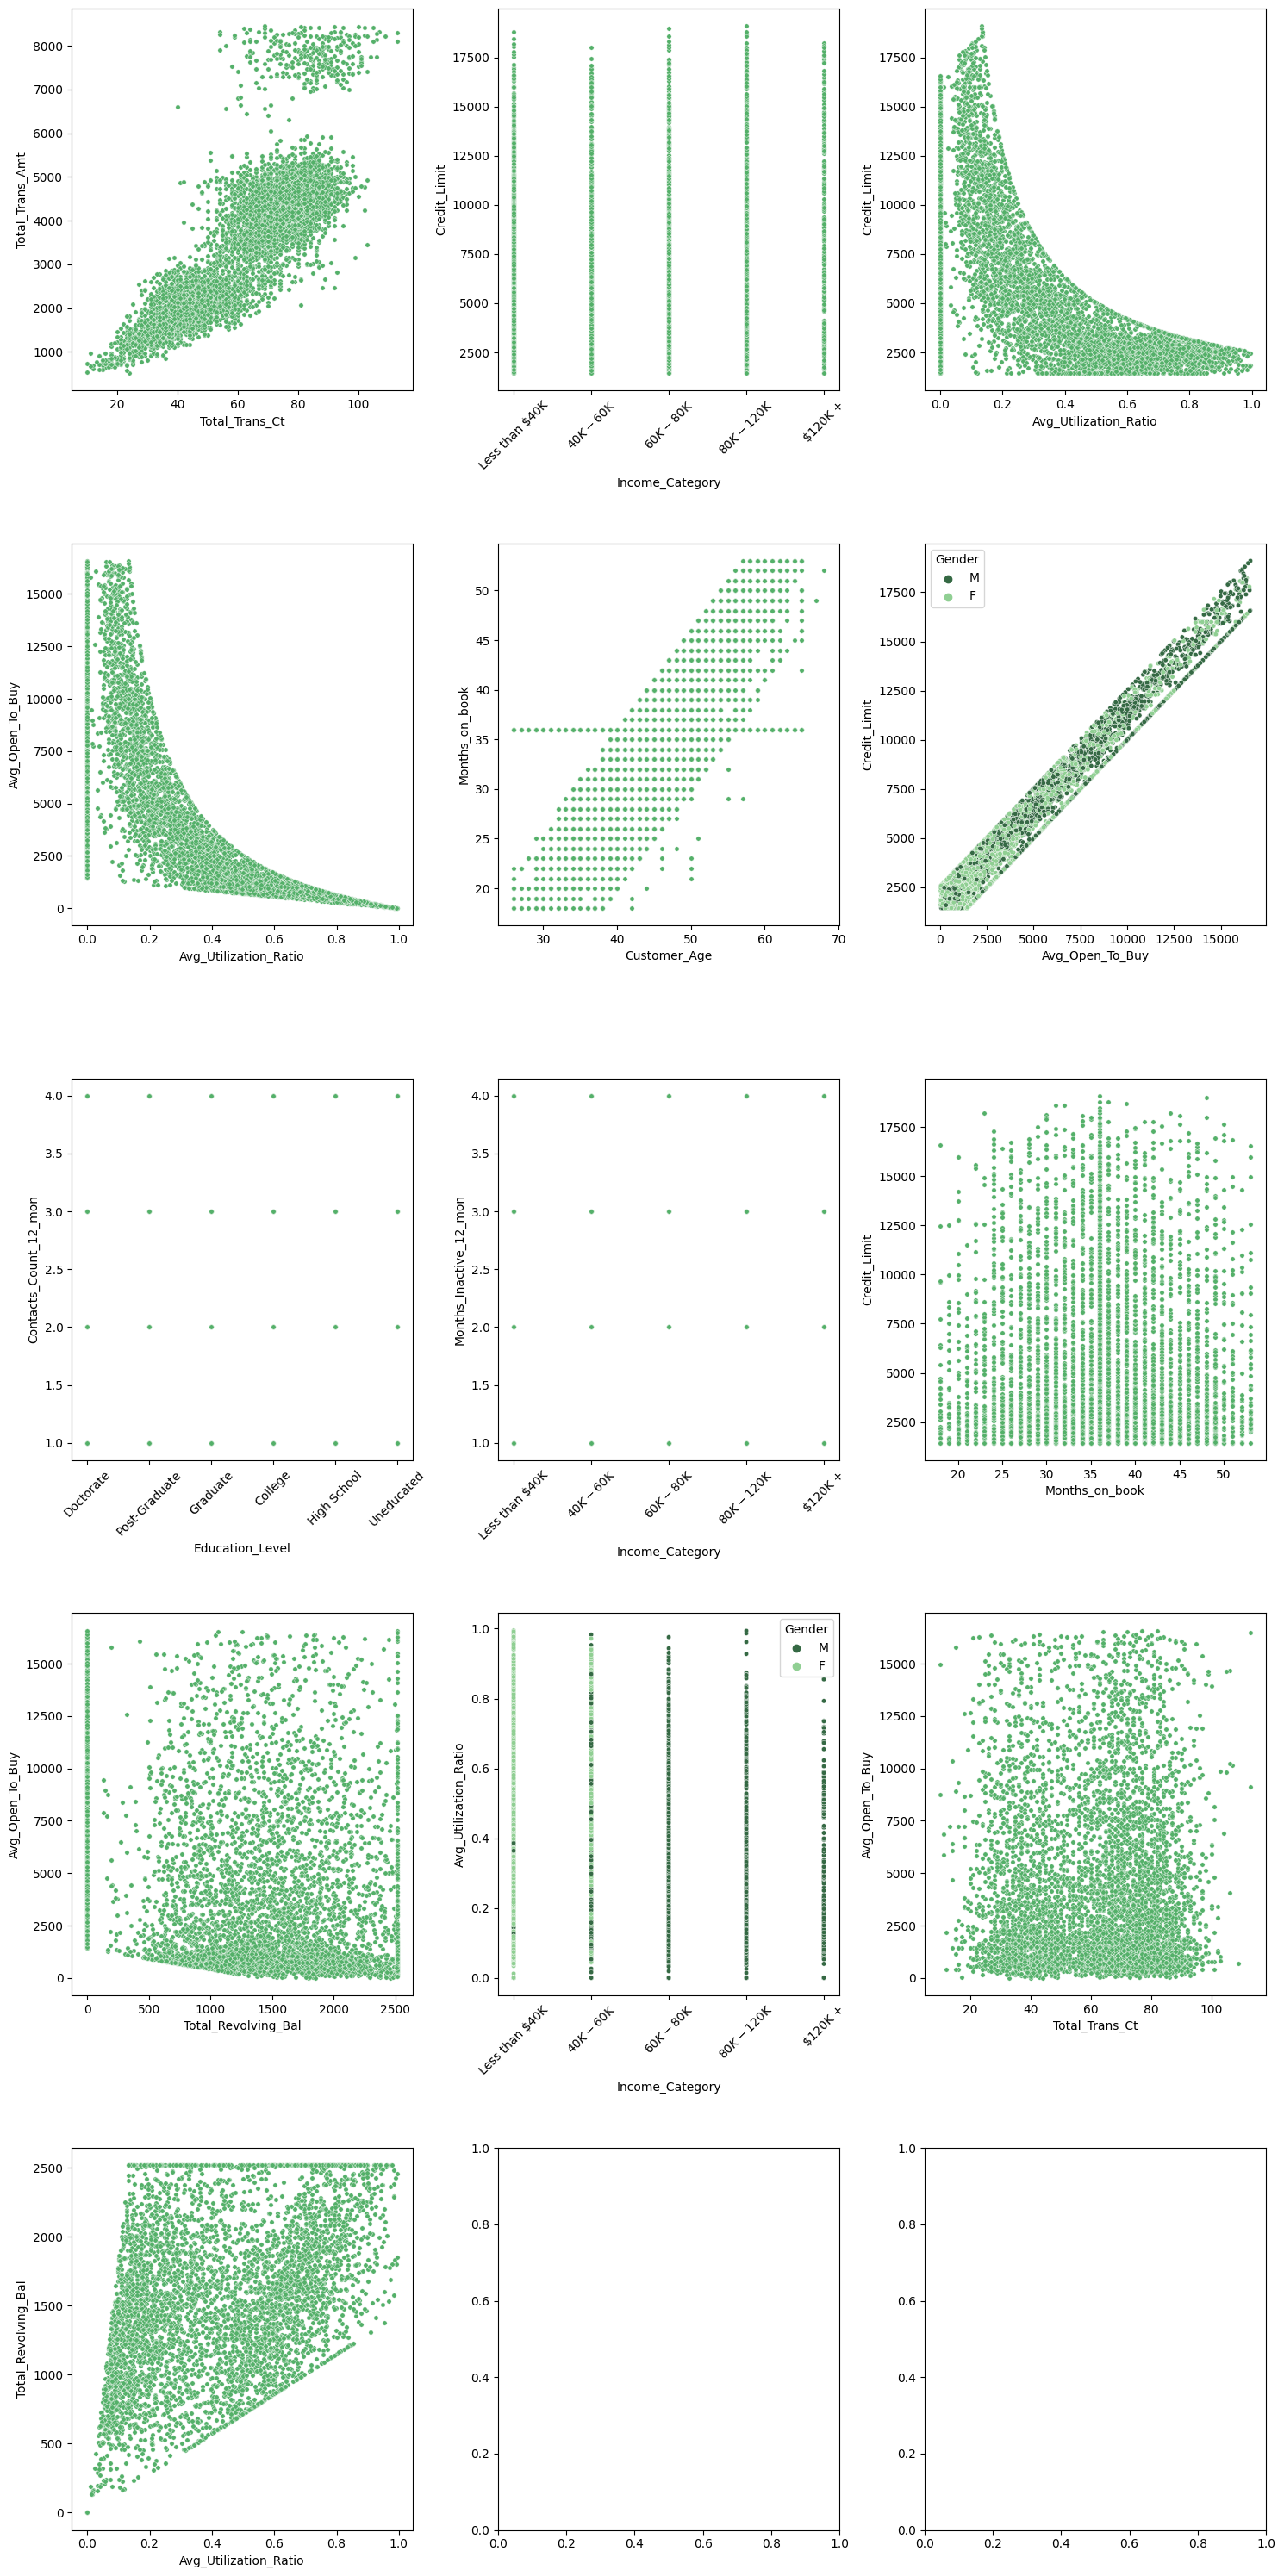

In [33]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,30))

# engag_titles = ['Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


# for i in range(15):
#     sns.scatterplot(x="Total_Trans_Ct", y="Total_Trans_Amt", data=clean_data, s=15, color=colors[2], ax=axes[ i // 5, i % 5])
#     # axes[  i // 5, i % 5].set_title(engag_titles[i])



sns.scatterplot(x="Total_Trans_Ct", y="Total_Trans_Amt", data=clean_data, s=15, color=colors[2], ax=axes[ 0,0])
sns.scatterplot(x="Income_Category", y="Credit_Limit", data=clean_data, s=15, color=colors[2], ax=axes[0,1 ])
axes[0,1 ].tick_params(axis='x', rotation=45)
sns.scatterplot(x="Avg_Utilization_Ratio", y="Credit_Limit", data=clean_data, s=15, color=colors[2], ax=axes[0,2 ])
sns.scatterplot(x="Avg_Utilization_Ratio", y="Avg_Open_To_Buy", data=clean_data, s=15, color=colors[2], ax=axes[ 1,0])
sns.scatterplot(x="Customer_Age", y="Months_on_book", data=clean_data, s=15, color=colors[2], ax=axes[ 1,1])
sns.scatterplot(x="Avg_Open_To_Buy", y="Credit_Limit", data=clean_data, hue="Gender", s=15, palette=[colors[5],colors[0]], ax=axes[ 1,2])
sns.scatterplot(x="Education_Level", y="Contacts_Count_12_mon", data=clean_data, s=15, color=colors[2], ax=axes[ 2,0])
axes[2,0 ].tick_params(axis='x', rotation=45)
sns.scatterplot(x="Income_Category", y="Months_Inactive_12_mon", data=clean_data, s=15, color=colors[2], ax=axes[ 2,1])
axes[2,1 ].tick_params(axis='x', rotation=45)
sns.scatterplot(x="Months_on_book", y="Credit_Limit", data=clean_data, s=15, color=colors[2], ax=axes[ 2,2])
sns.scatterplot(x="Total_Revolving_Bal", y="Avg_Open_To_Buy", data=clean_data, s=15, color=colors[2], ax=axes[ 3,0])
sns.scatterplot(x="Income_Category", y="Avg_Utilization_Ratio", data=clean_data,  hue="Gender", s=15, palette=[colors[5],colors[0]], ax=axes[ 3,1])
axes[3,1 ].tick_params(axis='x', rotation=45)
# sns.scatterplot(x="Avg_Utilization_Ratio", y="Avg_Open_To_Buy", data=clean_data, s=15, color=colors[2], ax=axes[ 3,2])
sns.scatterplot(x="Total_Trans_Ct", y="Avg_Open_To_Buy", data=clean_data, s=15, color=colors[2], ax=axes[3,2 ])
sns.scatterplot(x="Avg_Utilization_Ratio", y="Total_Revolving_Bal", data=clean_data, s=15, color=colors[2], ax=axes[ 4,0])


# Adjust layout to add more space between rows
plt.tight_layout()

# # Add extra space between rows
plt.subplots_adjust(hspace=0.4)   
# plt.savefig('Pairplot',bbox_inches='tight',dpi=300)


## Preprocessing I

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Create a copy of the data to keep the original intact
encoded_data = clean_data.copy()

# Define LabelEncoder instance
label_encoder = LabelEncoder()

# Label Encoding for ordinal categorical features
encoded_data['Education_Level'] = label_encoder.fit_transform(encoded_data['Education_Level'])
encoded_data['Income_Category'] = label_encoder.fit_transform(encoded_data['Income_Category'])

# One-Hot Encoding for nominal categorical features
# Using pd.get_dummies for simplicity

encoded_data = pd.get_dummies(encoded_data, columns=['Marital_Status', 'Card_Category'])

encoded_data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'M' else 0)
encoded_data['Attrition_Flag'] = data['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)


## Correlation

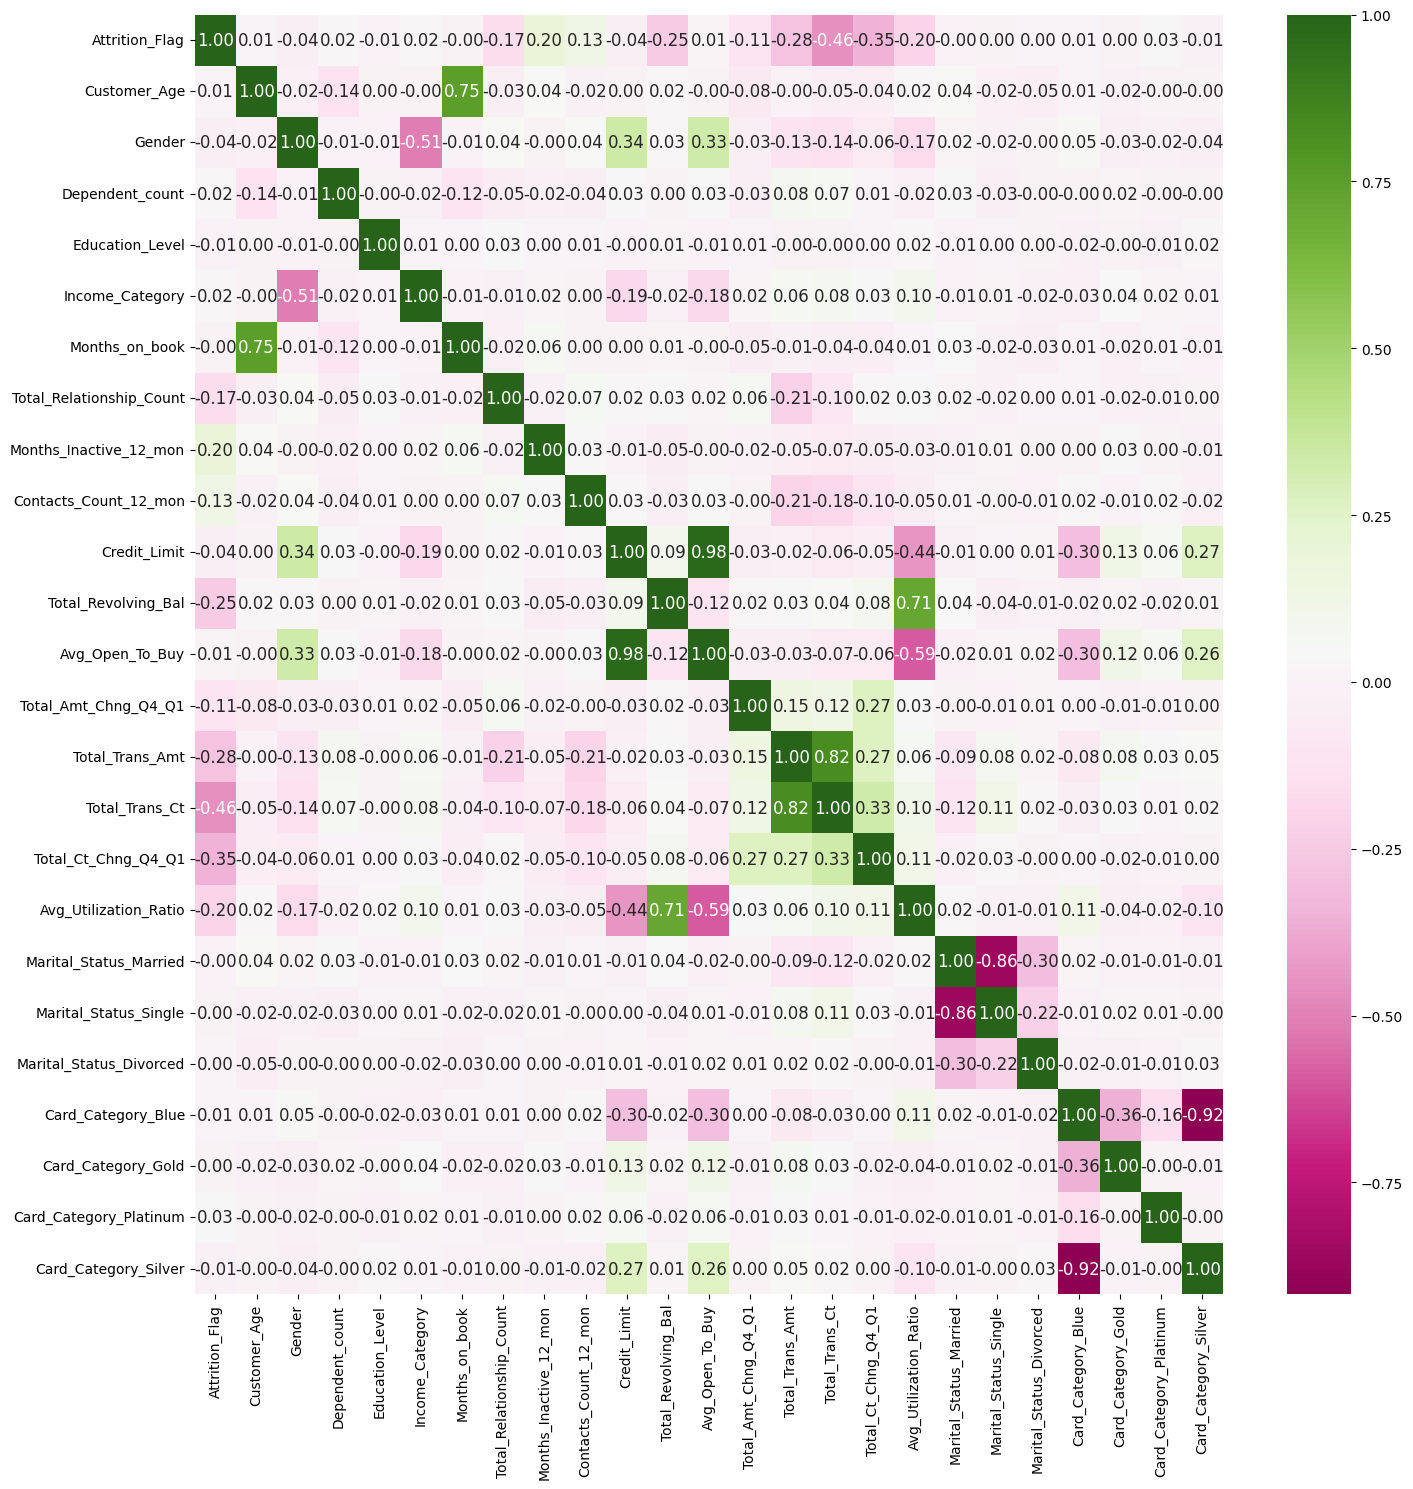

In [25]:
correlation_matrix = encoded_data.corr()

plt.figure(figsize=(15, 15))


sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt=".2f",annot_kws={'size': 12})
plt.tight_layout()
# plt.savefig('corr',bbox_inches='tight',dpi=300)
plt.show()

In [26]:
correlation_with_attrition = correlation_matrix['Attrition_Flag'].sort_values(ascending=False)
print(correlation_with_attrition)

Attrition_Flag              1.000000
Months_Inactive_12_mon      0.200456
Contacts_Count_12_mon       0.126290
Card_Category_Platinum      0.028798
Dependent_count             0.024272
Income_Category             0.019417
Avg_Open_To_Buy             0.011606
Customer_Age                0.009278
Card_Category_Blue          0.007438
Marital_Status_Divorced     0.004358
Card_Category_Gold          0.002658
Marital_Status_Single       0.002041
Months_on_book             -0.000709
Marital_Status_Married     -0.004272
Education_Level            -0.006268
Card_Category_Silver       -0.014091
Gender                     -0.037272
Credit_Limit               -0.040464
Total_Amt_Chng_Q4_Q1       -0.105566
Total_Relationship_Count   -0.166143
Avg_Utilization_Ratio      -0.204658
Total_Revolving_Bal        -0.250049
Total_Trans_Amt            -0.282100
Total_Ct_Chng_Q4_Q1        -0.351080
Total_Trans_Ct             -0.456916
Name: Attrition_Flag, dtype: float64


In [27]:
clean_data['Attrition_Flag'].value_counts()

Existing Customer    5380
Attrited Customer    1083
Name: Attrition_Flag, dtype: int64

In [28]:
encoded_data['Attrition_Flag'].value_counts()

0    5380
1    1083
Name: Attrition_Flag, dtype: int64

## Preprocessing II

In [29]:
from sklearn.model_selection import train_test_split

X = encoded_data.drop("Attrition_Flag", axis=1)  # All columns except "Attrition_Flag" are features
y = encoded_data["Attrition_Flag"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)  # 80% training, 20% testing

0    4292
1     878
Name: Attrition_Flag, dtype: int64


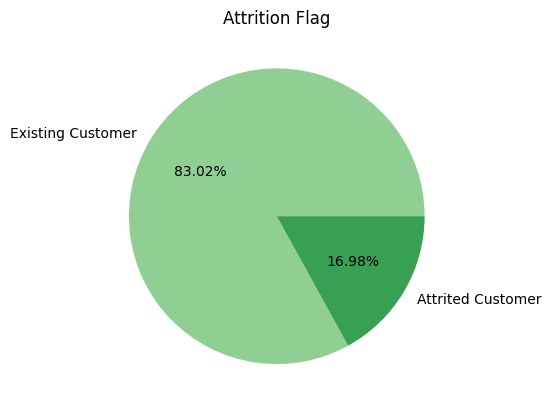

In [30]:
counts_attrition_flag = y_train.value_counts()
print(counts_attrition_flag)

plt.pie(x= counts_attrition_flag, labels=['Existing Customer','Attrited Customer'], autopct="%1.2f%%", colors=[colors[0],colors[3]])
plt.title('Attrition Flag')
# plt.savefig('Imbalanced_Attrition',bbox_inches='tight',dpi=300)
plt.show()

In [31]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='auto', random_state=7)

X_train_ranSamp, y_train_ranSamp = sm.fit_resample(X_train, y_train)

0    4292
1    4292
Name: Attrition_Flag, dtype: int64


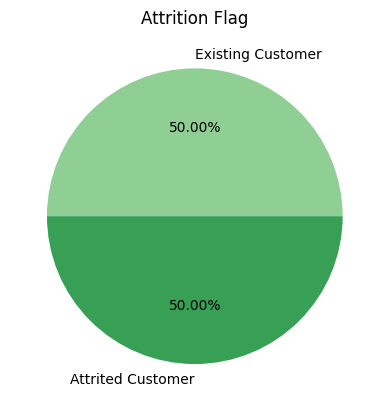

In [32]:
counts_attrition_flag = y_train_ranSamp.value_counts()
print(counts_attrition_flag)

plt.pie(x= counts_attrition_flag, labels=['Existing Customer','Attrited Customer'], autopct="%1.2f%%", colors=[colors[0],colors[3]])
plt.title('Attrition Flag')
# plt.savefig('Balanced_Attrition',bbox_inches='tight',dpi=300)
plt.show()

## Prdective Modeling

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix,recall_score, precision_score, f1_score,  roc_curve, auc

In [35]:
def compute_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    AUC = auc(fpr, tpr)
    con = confusion_matrix(y_test, y_pred)

    return({'Accuracy':accuracy, 'Precision':precision, 'Recall':recall, 'f1':f1, 'AUC':AUC, 'Confusion Matrix':con})

In [36]:
X_train_ranSamp.shape

(8584, 24)

In [37]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train_ranSamp, y_train_ranSamp)
y_pred = model.predict(X_test)
DT_metrics = compute_metrics(y_test, y_pred)
print(DT_metrics)

{'Accuracy': 0.9303944315545244, 'Precision': 0.7489177489177489, 'Recall': 0.8439024390243902, 'f1': 0.7935779816513762, 'AUC': 0.8952968077474891, 'Confusion Matrix': array([[1030,   58],
       [  32,  173]], dtype=int64)}


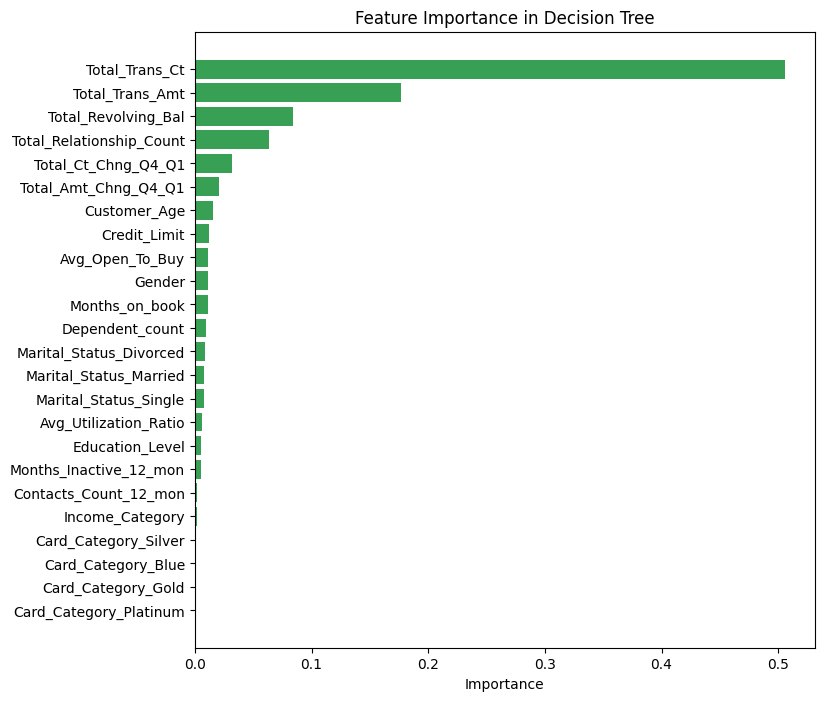

In [38]:
# Get feature importances
importances = model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.rcParams['ytick.labelsize'] = 10

# Plotting the feature importances
plt.figure(figsize=(8, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors[3])
plt.xlabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()  # To display the most important feature at the top
# plt.savefig('DT_Importance',bbox_inches='tight',dpi=300)
plt.show()

In [39]:
model = LogisticRegression(random_state=1)
model.fit(X_train_ranSamp, y_train_ranSamp)
y_pred = model.predict(X_test)
LR_metrics = compute_metrics(y_test, y_pred)
print(LR_metrics)

{'Accuracy': 0.8383604021655066, 'Precision': 0.49421965317919075, 'Recall': 0.8341463414634146, 'f1': 0.6206896551724137, 'AUC': 0.8366503766140602, 'Confusion Matrix': array([[913, 175],
       [ 34, 171]], dtype=int64)}


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
# Get the coefficients
coefficients = model.coef_[0]
intercept = model.intercept_

# Create a DataFrame for better visualization
coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

coeff_df

,Feature,Coefficient
7,Months_Inactive_12_mon,0.534394
4,Income_Category,0.304198
2,Dependent_count,0.301261
8,Contacts_Count_12_mon,0.285047
20,Card_Category_Blue,0.132712
0,Customer_Age,0.112613
9,Credit_Limit,0.074280
12,Total_Amt_Chng_Q4_Q1,0.048346
3,Education_Level,0.018952
13,Total_Trans_Amt,0.000646


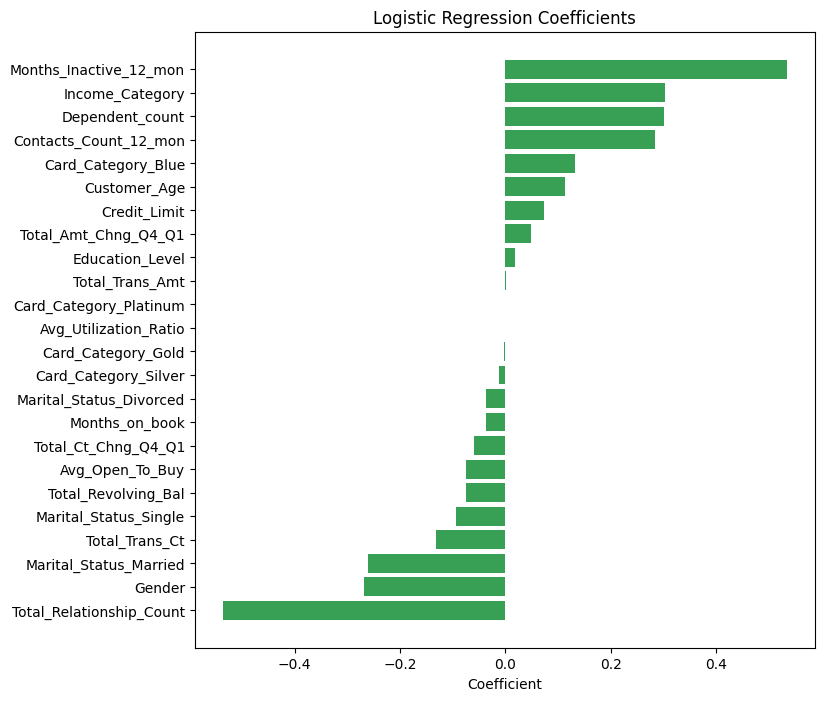

In [41]:
plt.rcParams['ytick.labelsize'] = 10
# Plotting the coefficients
plt.figure(figsize=(8, 8))
plt.barh(coeff_df['Feature'], coeff_df['Coefficient'], color=colors[3])
plt.xlabel('Coefficient')
plt.title('Logistic Regression Coefficients')
plt.gca().invert_yaxis()
# plt.savefig('LR_Importance',bbox_inches='tight',dpi=300)
plt.show()

In [42]:
model = XGBClassifier(objective='binary:logistic', random_state=1)
model.fit(X_train_ranSamp, y_train_ranSamp)
y_pred = model.predict(X_test)
XG_metrics = compute_metrics(y_test, y_pred)
print(XG_metrics)

{'Accuracy': 0.9675174013921114, 'Precision': 0.893719806763285, 'Recall': 0.9024390243902439, 'f1': 0.8980582524271845, 'AUC': 0.9411092180774748, 'Confusion Matrix': array([[1066,   22],
       [  20,  185]], dtype=int64)}


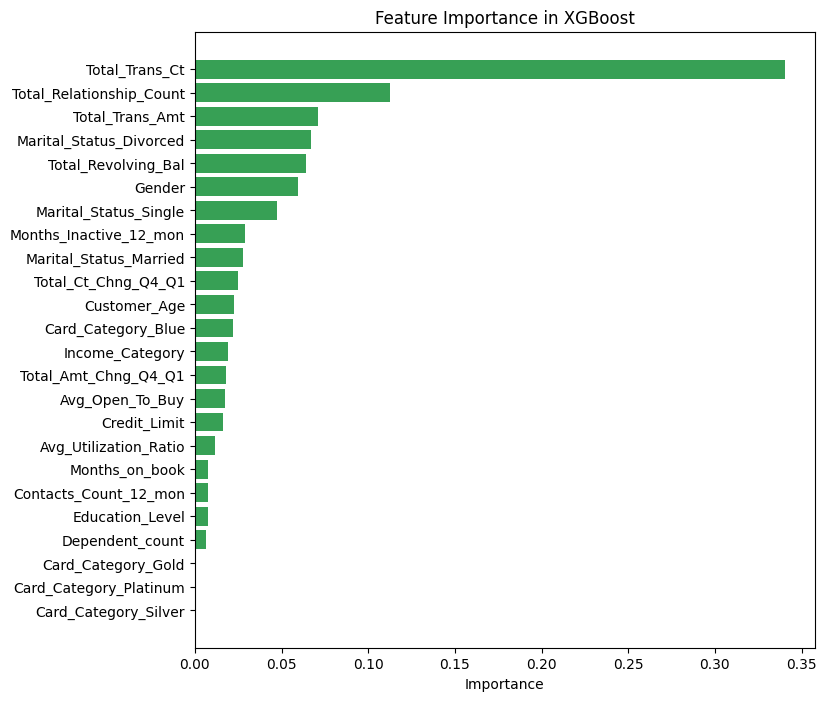

In [43]:
# Get feature importances
importances = model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.rcParams['ytick.labelsize'] = 10

# Plotting the feature importances
plt.figure(figsize=(8, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors[3])
plt.xlabel('Importance')
plt.title('Feature Importance in XGBoost')
plt.gca().invert_yaxis()  # To display the most important feature at the top
# plt.savefig('XG_Importance',bbox_inches='tight',dpi=300)
plt.show()

## Performance of Models

In [44]:
print(DT_metrics)
print(LR_metrics)
print(XG_metrics)

mod = [DT_metrics, LR_metrics, XG_metrics]
accuracy = [m['Accuracy'] for m in mod]
precision = [m['Precision'] for m in mod]
recall = [m['Recall'] for m in mod]

print(accuracy)
print(precision)
print(recall)

{'Accuracy': 0.9303944315545244, 'Precision': 0.7489177489177489, 'Recall': 0.8439024390243902, 'f1': 0.7935779816513762, 'AUC': 0.8952968077474891, 'Confusion Matrix': array([[1030,   58],
       [  32,  173]], dtype=int64)}
{'Accuracy': 0.8383604021655066, 'Precision': 0.49421965317919075, 'Recall': 0.8341463414634146, 'f1': 0.6206896551724137, 'AUC': 0.8366503766140602, 'Confusion Matrix': array([[913, 175],
       [ 34, 171]], dtype=int64)}
{'Accuracy': 0.9675174013921114, 'Precision': 0.893719806763285, 'Recall': 0.9024390243902439, 'f1': 0.8980582524271845, 'AUC': 0.9411092180774748, 'Confusion Matrix': array([[1066,   22],
       [  20,  185]], dtype=int64)}
[0.9303944315545244, 0.8383604021655066, 0.9675174013921114]
[0.7489177489177489, 0.49421965317919075, 0.893719806763285]
[0.8439024390243902, 0.8341463414634146, 0.9024390243902439]


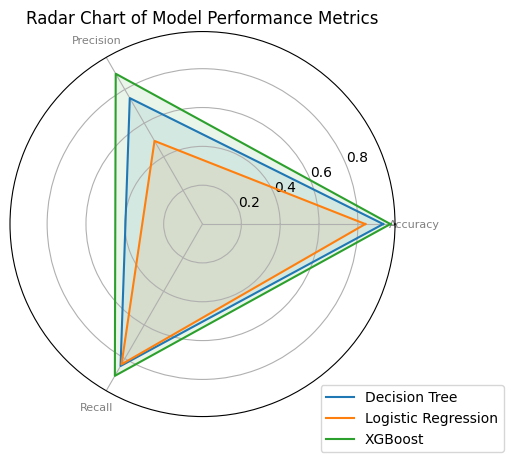

In [46]:
from math import pi

# Example data
metrics = ['Accuracy', 'Precision', 'Recall']
DT = [DT_metrics[i] for i in metrics]
LR = [LR_metrics[i] for i in metrics]
XG = [XG_metrics[i] for i in metrics]

data = [DT, LR, XG]
models = ["Decision Tree", "Logistic Regression", "XGBoost"]

# Number of variables
num_vars = len(metrics)

# Compute angle for each axis
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Plotting
plt.figure(figsize=(5, 5))

ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], metrics, color='grey', size=8)

for i, model in enumerate(models):
    values = data[i]
    values += values[:1]
    ax.plot(angles, values, label=model)
    ax.fill(angles, values, alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 0.1))

# Show the plot
plt.title('Radar Chart of Model Performance Metrics')
# plt.savefig('Radar_metric',bbox_inches='tight',dpi=300)

plt.show()
